# (1.) ตรวจสอบโครงสร้าง RNN

สร้าง Model NN ปกติ และ RNN อย่างง่าย โดยใช้ SimpleRNN ใน Keras เพื่อตรวจดูว่ามีค่าพารามิเตอร์ (Weight) อะไรบ้าง

## NN

ลำดับแรก สร้าง NN ปกติขนาด 1 อินพุต และ 1 Layer เพื่อดูโครงสร้างแล้วนำไปเปรียบเทียบกับโครงสร้าง RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_shape=(1,)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- ชั้น Dense คือ Node ในชั้น Layer มีจำนวน Parameters (Param) 2 ตัว คือ weight 1 ตัว และ 1 bias (ตามปกติของ Neuron ทั่วไป)

ในโครงสร้าง Model ได้ทำการเพิ่มเฉพาะ Dense (Node) เท่านั้น ไม่ต้องสั่งสร้าง Input Layer แต่เมื่อดูสรุป จะพบว่าระบบทำการสร้าง Input Layer ให้เองอัตโนมัติ

In [ ]:
model.get_config()

{'name': 'sequential',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 1),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 1),
    'units': 1,
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'build_config': {'input

ทำการอ่านจำนวนค่าพารามิเตอร์ จะพบว่ามี 2 ค่า

In [ ]:
len(model.layers[0].get_weights())

2

วนรอบอ่านค่า จะพบว่ามี 2 ค่า คือ weight และ bias ซึ่งขณะนี้ยังไม่ได้ทำการ Train ค่า weight และ bias จะเป็นค่าสุ่มที่ระบบตั้งให้ก่อน

In [ ]:
for wi in model.layers[0].get_weights():
  print(wi.shape, wi)

(1, 1) [[-0.16447842]]
(1,) [0.]


เมื่อทำการ Train ค่าเหล่านี้จะถูกอัปเดตตามกระบวนการ Train (Backpropagation) ตอนนี้เพียงแค่ตรวจดูเพื่อให้เห็นว่า 1 /neuron มี weight อะไรบ้าง

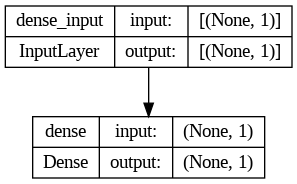

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'MLP1.png', show_shapes=True, show_layer_names=True)

ดูผังโมเดล RNN

## RNN
สร้าง RNN ขนาด 1 cell (เทียบได้กับ Neuron 1 Node)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(units=1, input_shape=(1,1), activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


จะได้ Layer RNN 1 cell โดย Activation function ของชั้นนี้ กำหนดให้ใช้ ReLU (ให้มองว่า RNN ก็คล้ายกับ Node ของ NN ตัวหนึ่ง) จะได้สรุปดังนี้

ชั้น RNN ค่า Param 3 หมายถึงมีค่าพารามิเตอร์ จำนวน 3 ตัว ซึ่งก็คือ weight 2 ตัว และ bias อีก 1 ตัว

สังเกตว่าถ้าเป็น Neuron ปกติ (add Dense) จะมีพารามิเตอร์ 2 ตัว เท่านั้น

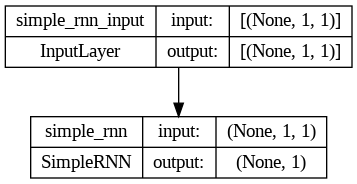

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'rnn1.png', show_shapes=True, show_layer_names=True)

วนรอบอ่านค่า Weight ของ RNN (layer[0]) จะพบว่ามี 3 ค่า คือ weight 2 ตัว และ bias 1 ตัว รวมเป็น 3 ซึ่งขณะนี้ยังไม่ได้ทำการ Train ค่า weight และ bias จะได้จากการตั้งค่าเริ่มต้นให้ก่อน เมื่อทำการ Train ค่าเหล่านี้จะถูกอัปเดตตามกระบวนการ Train (เรายังไม่สนใจค่าในขณะยี้ ต้องดูว่ามีจำนวน weight เท่าใด)

In [ ]:
for wi in model.layers[0].get_weights():
  print(wi.shape, wi)

(1, 1) [[-1.6043034]]
(1, 1) [[-1.]]
(1,) [0.]


# (2.) สร้าง RNN อย่างง่าย

ข้อนี้ มีข้อมูล Dataset คือ เลขชุด (ข้อมูลอนุกรมเวลา)

1 2 3 4 ... 20 0 1 2 3 ... 20   ค่าเริ่มจาก 1 2 ... ไปจนถึง 20 แล้วลง 0 ใหม่

ตัวอย่างนี้ จะแสดงการสร้าง Model ให้เรียนรู้ข้อมูลลำดับ (Dataset) แล้วทำการ Predict ว่าเลขลำดับต่อไปคืออะไร โดยใช้ RNN อย่าง่ายคือ SimpleRNN ของ Keras

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

## create data

สร้างข้อมูล Dataset โดยสามารถพิมพพ์ข้อมูลเข้าไปตรงๆได้ (เช่น 1 2 3 ...) แต่ในที่นี้จะใช้โค้ดสร้าง โดยทำการ mod ด้วยค่าใดค่าหนึ่ง เช่น y % 20 เท่ากับว่าพอค่าขึ้นเกิน 20 จะปัดให้เริ่มต้นที่ 1 ใหม่ เป็นลักษณะสัญญาณ "ฟันเลื่อย"

In [ ]:
pitch = 20    # ให้รีเซตค่า y ลง 0 เมื่อ x ครบทุกๆ 20 (ค่าที่จะนำไป mod)
step = 1    # ค่า step จะกล่าวถึงภายหลัง
N = 100     # จำนวนข้อมูล
n_train = int(N * 0.7)   # จำนวนข้อมูลที่จะใช้สำหรับ Train ตัวอย่างนี้ใช้ 70%

def gen_data(x):    # สร้างข้อมูล Dataset โดยการ mod
  return (x % pitch) / pitch    # หารเพื่อทำ Normalize

t = np.arange(1, N+1)     # สร้างข้อมูล 1 2 3 4 ... 100
# t = np.flip(t)    # หากต้องการสร้างข้อมูลมากไปน้อย เช่น 100 99 98 ...
y = [gen_data(i) for i in t]    # สร้างค่า y
# y = np.sin(.05 * t) + 0.5*np.random.rand(N)   # กรณีต้องการค่าแบบ Sine wave

y = np.array(y)   # เปลี่ยนเป็น Numpy Array
print(y[:15])     # แสดงข้อมูลตัวอย่าง

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75]


จะได้ค่า y ที่ Normalize แล้วมีค่า 0 ถึง 1 ดังนี้ (หากไม่ทำการ Normalize y จะมีค่า 1 2 3 ... 20 ซึ่งไม่เหมาะกับการประมวลผล Neuron)

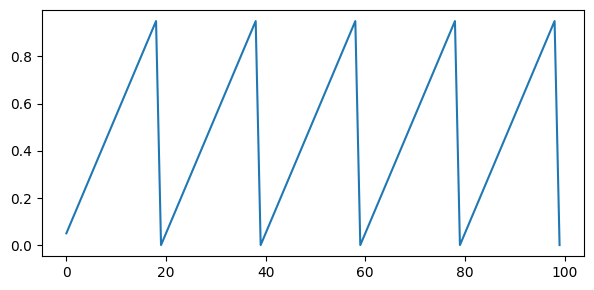

In [ ]:
plt.figure(figsize=(7,3.2))
plt.plot(y)
plt.show()

ทำการ Visualize ดูข้อมูล จะได้คลื่นสัญญาณฟันเลื่อยดังกล่าว และค่าจะอยู่ระหว่าง 0-1 เนื่องจาก Normalize แล้ว

## เตรียมข้อมูล

เตรียมข้อมูลอนุกรมเวลา ตามตัวอย่างนี้

In [ ]:
# สร้างข้อมูล X, y เปลี่ยนเป็นเมทริกซ์ตาม Step ที่กำหนด
def convertToMatrix(data, step=1):
  X, Y = [], []
  for i in range(len(data) - step):
    d = i + step
    X.append(data[i:d,])
    Y.append(data[d,])
  return np.array(X), np.array(Y)

## แบ่งข้อมูลเป็น Train, Test และเปลี่ยนเป็นเมทริกซ์


Model แบบ Classification ตอนแบ่งข้อมูลจะใช้การสุ่ม

Model สำหรับข้อมูล Time-series จะแบ่งข้อมูลโดยใช้ลำดับเวลา เช่น มีข้อมูลสภาพอากาศ 12 เดือน อาจจะแบ่ง 11 เดือนใช้สำหรับ Train ส่วนเดือน 12 ใช้สำหรับ Test โดยขั้นตอนนี้จะทำการแบ่ง แล้วเปลี่ยนเป็นเมทริกซ์

In [ ]:
N = 100   # จำนวนข้อมูลทั้งหมด
n_train = 70    # จำนวนข้อมูลสำหรับ Train
step = 1    # จำนวน x ที่ใช้เพื่อหา y
train, test = y[0: n_train], y[n_train: N]
print('train test (before conversion):', train.shape, test.shape)

X_train, y_train = convertToMatrix(train, step)
X_test, y_test = convertToMatrix(test, step)

print('train test (after conversion):', X_train.shape, X_test.shape)

train test (before conversion): (70,) (30,)
train test (after conversion): (69, 1) (29, 1)


- เมื่อแบ่งแล้ว จะได้ขนาด Train, Test เป็น 70 และ 30 ตามลำดับ
- หลังจากการนำ Train Test ไปแปลงเป็นข้อมูลเมทริกซ์ จะมีขนาดเป็น 69 และ 29 ตามลำดับ เนื่องจากมีการดึงค่าออกไปใช้เป็นค่า y 1 ค่า (ตาม step=1)

In [ ]:
X_train[:5], y_train[:5]

(array([[0.05],
        [0.1 ],
        [0.15],
        [0.2 ],
        [0.25]]),
 array([0.1 , 0.15, 0.2 , 0.25, 0.3 ]))

นี่คือข้อมูล Train ที่ได้ กรณี Step=1

## สร้าง Model
ทำการสร้าง Model กำหนดให้จำนวน Cell (units) มี 32 Cell Activation ใช้ ReLU และมี Output 1 Node (โครงสร้างมี RNN 1 ชั้น แต่มีจำนวน Cell ต่างกัน) ซึ่ง input shape จะต้องกำหนดให้ตรงกับโครงสร้างข้อมูล Step ที่ได้เตรียมไว้ก่อนหน้านี้

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(step, 1), activation="relu"))
# input_shape = (num x to y, num y)
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


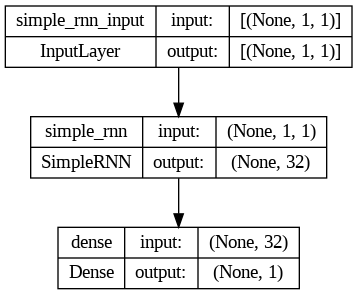

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'simple_rnn.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

ทำการ Train และพล็อตกราฟ Loss

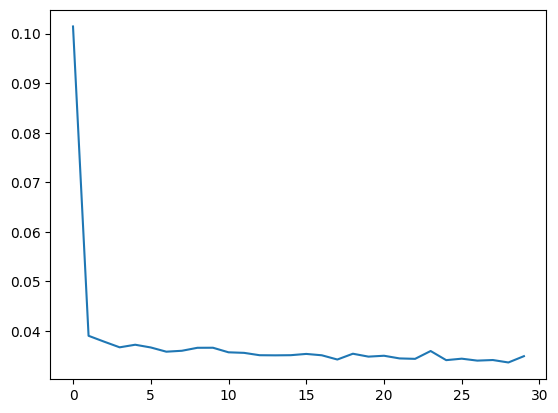

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=1, verbose=0)

plt.plot(history.history['loss'])
plt.show()

## พล็อตดูผล
นำข้อมูล X_train และ X_test ไปทำการ Predict แล้วพล็อตเปรียบเทียบระหว่าง ค่าจริง(y_train, y_test) กับค่าที่ได้จากการ Predict

In [ ]:
trainPredict = model.predict(X_train)   # ทำการ Predict X_train
testPredict = model.predict(X_test)   # ทำการ Predict X_test

prefix = np.empty(step).reshape(-1, 1)    # เติมส่วนที่หายไปจาก Dataset ด้วย NaN
prefix.fill(np.nan)   # เพื่อใช้สำหรับพล็อตกราฟเท่านั้น

trainPredict = np.concatenate((prefix, trainPredict), axis=0)   # รวมข้อมูลเพื่อพล็อตกราฟ
testPredict = np.concatenate((prefix, testPredict), axis=0)

predicted = np.concatenate((trainPredict,testPredict),axis=0)   # รวมข้อมูล Predicted

1/1 [==============================] - 0s 31ms/step


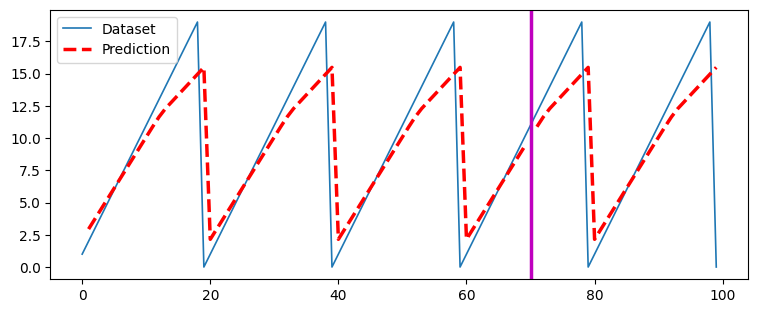

In [ ]:
plt.figure(figsize=(9,3.5))
plt.plot(y * pitch, lw=1.2, label='Dataset')    # dataset
plt.plot(predicted * pitch, 'r--', lw=2.5, label='Prediction')
plt.axvline(n_train, c='m', lw=2.5)

plt.legend(loc=2)
plt.show()

จากรูปที่ได้ มีการแบ่งออกเป็น 2 ส่วนคือ ด้านซ้ายของข้อมูล Train(70%) ส่วนด้านขวาคือส่วนของข้อมูล Test(30%) ส่วนเส้นประคือที่ได้จากการ Predict โดยใช้ค่า X_train และ X_test เป็นอินพุตป้อนเข้า Model จะเห็นว่ามีผลลัพธ์การ Predict คลาดเคลื่อนอยู่บ้าง แต่แนวโน้มขึ้นลงจะเป็นไปตาม Dataset ที่ Model เรียนรู้

## ทำการ Predict

ทดลอง Predict โดยป้อนค่า New input เข้าไป เช่น สมมุติว่าถ้าข้อมูลขณะนี้คือ 1 ข้อมูลตัวต่อไปจะเป็นอะไร (คล้ายๆกับการทำนายล่วงหน้า)

In [ ]:
new_x = 1
new_x = np.array(new_x).reshape(1, 1)
print(new_x)

pred = model.predict(new_x / pitch)
prediction = pred * pitch
print(pred)

[[1]]
1/1 [==============================] - 0s 31ms/step
[[0.14716491]]


In [ ]:
new_x = [1, 2, 3]
new_x = np.array(new_x).reshape(-1, 1)
print(new_x)

pred = model.predict(new_x / pitch)
prediction = pred * pitch
print(pred)

[[1]
 [2]
 [3]]
1/1 [==============================] - 0s 20ms/step
[[0.14716491]
 [0.18679279]
 [0.22642066]]


การหารด้วย pitch คือเป็นการทำ Normalize ข้อมูลก่อนส่งเข้า Model (เนื่องจากตอน Train ได้ทำ Normalize ไว้) ส่วนการคูณ pitch คือการคูณกลับให้เป็นค่าปกติ

ทดลองค่า new_x อื่นๆ เช่น 2 3 4 จะพบว่าผลการ Predict ได้ค่า ประมาณ 3.x 4.x ... ซึ่งจะเห็นว่า Model ได้เรียนรู้จากข้อมูล Dataset ที่ทำการ Train ไป

# (3.) สร้าง RNN ค่า Step > 1

ทำต่อจากข้อที่ 2 ปรับเปลี่ยนค่าให้ dataset มีการเปลี่ยนแปลงขึ้นลงถี่กว่าเดิม

In [ ]:
def convertToMatrix(data, step=1):
  X, Y = [], []
  for i in range(len(data) - step):
    d = i + step
    X.append(data[i:d,])
    Y.append(data[d,])
  return np.array(X), np.array(Y)

## pitch: 20-->5

In [ ]:
pitch = 5    # เปลี่ยนเป็น 5
N = 100
n_train = int(N * 0.7)

def gen_data(x):
  return (x % pitch) / pitch

t = np.arange(1, N+1)
y = [gen_data(i) for i in t]

y = np.array(y)
print(y[:15])

[0.2 0.4 0.6 0.8 0.  0.2 0.4 0.6 0.8 0.  0.2 0.4 0.6 0.8 0. ]


In [ ]:
N = 100
n_train = 70
step = 1    # ใช้ตัวเดิมอยู่
train, test = y[0: n_train], y[n_train: N]
print('train test (before conversion):', train.shape, test.shape)

X_train, y_train = convertToMatrix(train, step)
X_test, y_test = convertToMatrix(test, step)

print('train test (after conversion):', X_train.shape, X_test.shape)

train test (before conversion): (70,) (30,)
train test (after conversion): (69, 1) (29, 1)


In [ ]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(step, 1), activation="relu"))
model.add(Dense(1))
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])
history = model.fit(X_train, y_train, epochs=30, batch_size=1, verbose=0)

In [ ]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

prefix = np.empty(step).reshape(-1, 1)
prefix.fill(np.nan)

trainPredict = np.concatenate((prefix, trainPredict), axis=0)
testPredict = np.concatenate((prefix, testPredict), axis=0)

predicted = np.concatenate((trainPredict,testPredict),axis=0)

1/1 [==============================] - 0s 21ms/step


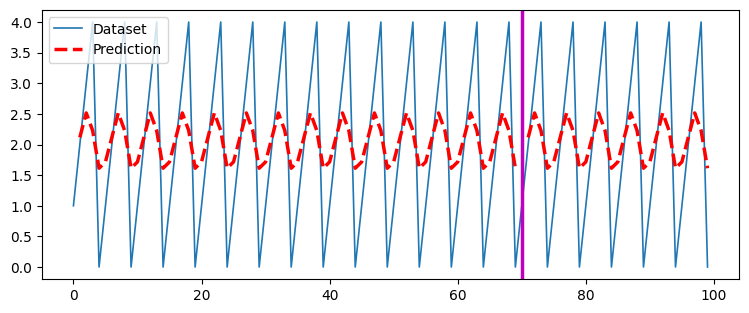

In [ ]:
plt.figure(figsize=(9,3.5))
plt.plot(y * pitch, lw=1.2, label='Dataset')    # dataset
plt.plot(predicted * pitch, 'r--', lw=2.5, label='Prediction')
plt.axvline(n_train, c='m', lw=2.5)

plt.legend(loc=2)
plt.show()

การเปลี่ยนค่า pitch เป็นการจำลองสร้างเพื่อให้ได้ค่าข้อมูลที่มีการเปลี่ยนแปลงถี่กว่าเดิม ซึ่งจะได้ค่าข้อมูล เช่น [1 2 3 4 0 1 2 3 4 0 ...]  ได้คลื่นฟันเลื่อยที่แหลมกว่าเดิม

จากกราฟ จะเห็นว่า Model มี Error สูง อาจเกิดจากการเรียนรู้ไม่ทันกับค่าข้อมูลที่เปลี่ยนแปลง

## pitch = 5, step = 2

In [ ]:
pitch = 5    # เปลี่ยนเป็น 5
N = 100
n_train = int(N * 0.7)

def gen_data(x):
  return (x % pitch) / pitch

t = np.arange(1, N+1)
y = [gen_data(i) for i in t]

y = np.array(y)

In [ ]:
N = 100
n_train = 70
step = 2    # เปลี่ยนเป็น 2
train, test = y[0: n_train], y[n_train: N]
print('train test (before conversion):', train.shape, test.shape)

X_train, y_train = convertToMatrix(train, step)
X_test, y_test = convertToMatrix(test, step)

print('train test (after conversion):', X_train.shape, X_test.shape)

train test (before conversion): (70,) (30,)
train test (after conversion): (68, 2) (28, 2)


In [ ]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(step, 1), activation="relu"))
model.add(Dense(1))
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])
history = model.fit(X_train, y_train, epochs=30, batch_size=1, verbose=0)

In [ ]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

prefix = np.empty(step).reshape(-1, 1)
prefix.fill(np.nan)

trainPredict = np.concatenate((prefix, trainPredict), axis=0)
testPredict = np.concatenate((prefix, testPredict), axis=0)

predicted = np.concatenate((trainPredict,testPredict),axis=0)

1/1 [==============================] - 0s 23ms/step


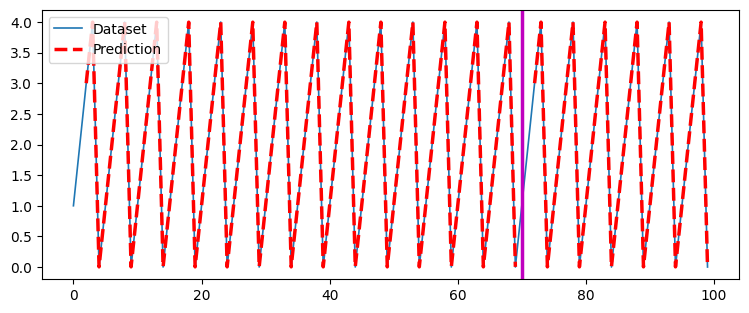

In [ ]:
plt.figure(figsize=(9,3.5))
plt.plot(y * pitch, lw=1.2, label='Dataset')    # dataset
plt.plot(predicted * pitch, 'r--', lw=2.5, label='Prediction')
plt.axvline(n_train, c='m', lw=2.5)

plt.legend(loc=2)
plt.show()

จะเห็นว่าเส้น Predict เกือบทับ เส้นของค่า y จริง แสดงว่า Model มีความแม่นยำสูงขึ้น สามารถเรียนรู้การเปลี่ยนแปลงได้ดีขึ้น

## pitch = 5, step = 3

In [ ]:
pitch = 5    # เปลี่ยนเป็น 5
N = 100
n_train = int(N * 0.7)

def gen_data(x):
  return (x % pitch) / pitch

t = np.arange(1, N+1)
y = [gen_data(i) for i in t]

y = np.array(y)

In [ ]:
N = 100
n_train = 70
step = 3    # เปลี่ยนเป็น 3
train, test = y[0: n_train], y[n_train: N]
print('train test (before conversion):', train.shape, test.shape)

X_train, y_train = convertToMatrix(train, step)
X_test, y_test = convertToMatrix(test, step)

print('train test (after conversion):', X_train.shape, X_test.shape)

train test (before conversion): (70,) (30,)
train test (after conversion): (67, 3) (27, 3)


In [ ]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(step, 1), activation="relu"))
model.add(Dense(1))
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])
history = model.fit(X_train, y_train, epochs=30, batch_size=1, verbose=0)

In [ ]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

prefix = np.empty(step).reshape(-1, 1)
prefix.fill(np.nan)

trainPredict = np.concatenate((prefix, trainPredict), axis=0)
testPredict = np.concatenate((prefix, testPredict), axis=0)

predicted = np.concatenate((trainPredict,testPredict),axis=0)

1/1 [==============================] - 0s 21ms/step


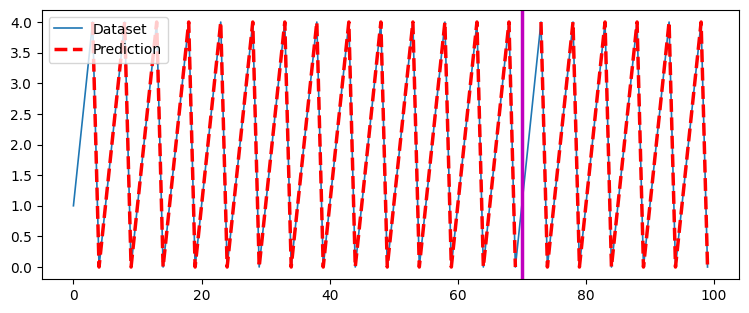

In [ ]:
plt.figure(figsize=(9,3.5))
plt.plot(y * pitch, lw=1.2, label='Dataset')    # dataset
plt.plot(predicted * pitch, 'r--', lw=2.5, label='Prediction')
plt.axvline(n_train, c='m', lw=2.5)

plt.legend(loc=2)
plt.show()

จากกราฟ ต่างกับของ pitch=5, step=2 นิดหน่อยตรงที่ เส้นประ(predict) ขยับออกไปทางขวานิดหน่อย

สรุป โครงสร้าง Step จำนวนมากขึ้น จะทำให้ Model เรียนรู้การเปลี่ยนแปลงได้ดีขึ้น อีกทั้ง การกำหนด step มีผลต่อมิติของ Input RNN ด้วย โดยจะต้องกำหนด input_shape ให้สัมพันธ์กับมิติข้อมูลที่ป้อนเข้าไป ซึ่งกำหนดไว้ตามโค้ดนี้

```
model.add(SimpleRNN(units=32, input_shape=(step, 1), activation="relu"))
```



# (4.) พยากรณ์ยอดขายล่วงหน้า LSTM

## การทำงานภายใน LSTM

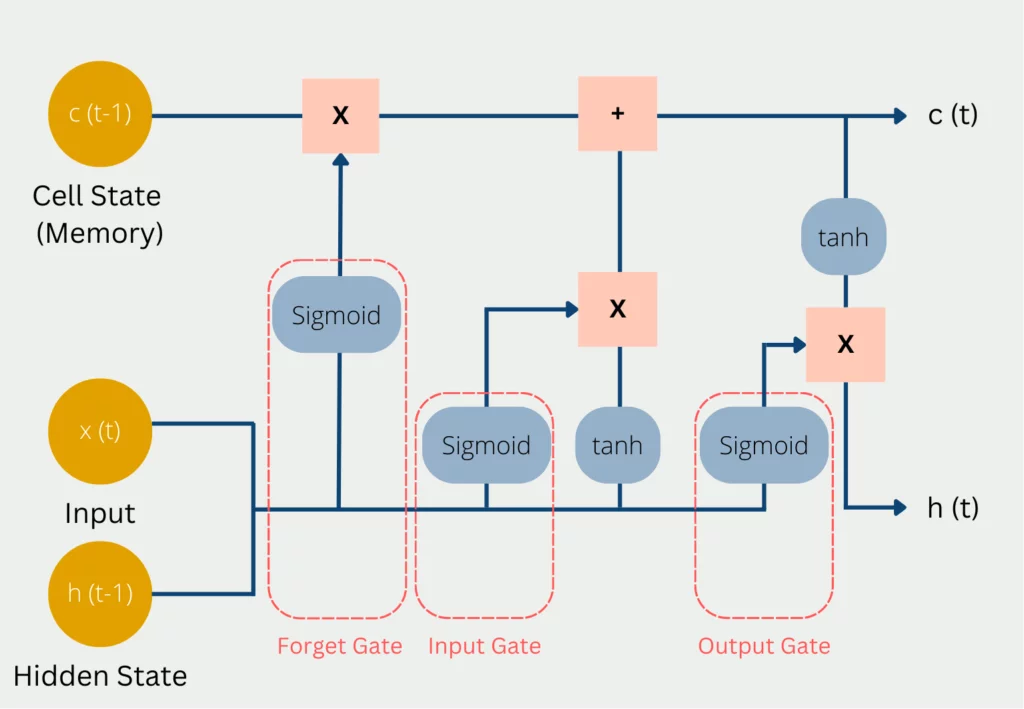

- Forget gate

Cell state ก่อนหน้า (Ct0) เป็นเมทริกซ์ที่มี 2 ค่า เมื่อนำไปประมวลผล แล้วต้องการให้ลืมค่าแรก และลดค่าลงครึ่งหนึ่งของตัวที่2 ก็ทำการคูณด้วย weight (Wt0)

In [ ]:
import numpy as np

Ct0 = np.array([[2],      # Cell state ก่อนหน้า
                      [3]])

Wt0 = np.array([[0],
                       [0.5]])

Ct = Ct0 * Wt0    # ผลลัพธ์ Cell state
print(Ct)

[[0. ]
 [1.5]]


- Input gate

Ct คือค่าที่ผ่าน forget gate, It คือ Information ใหม่ที่สำคัญเข้าไปเสริมเข้าไปด้วยการบวกค่าเมทริกซ์

In [ ]:
It = np.array([[0],
                    [0.2]])
Ct = Ct + It
print(Ct)

[[0. ]
 [1.7]]


จะได้ค่า Cell state จริงๆที่เอาไปประวลผลต่อใน Output gate

## Load data

ข้อนี้จะแสดงการ Predict ยอดขายในอนาคตด้วย LSTM โดยข้อมูล Dataset คือ ยอดขายรถรายเดือน ในระยะเวลา 108 เดือน (9 ปี) มีช่วงห่างเวลาแต่ละข้อมูล (Interval) ห่างเท่าๆกัน คือ 1 เดือน เป็นไฟล์ข้อมูล CSV มี 2 คอลัมน์คือ Month, Sales

เลือกเอาแต่ Sales เพราะ LSTM ไม่ได้ใช้ค่าของเวลา แต่ใช้เฉพาะค่าของข้อมูล

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

path = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv"
df = pd.read_csv(path, usecols=['Sales'])   # ใช้เฉพาะคอลัมน์ Sales

ตรวจสอบข้อมูลเบื้องต้น และพล็อตดูแนวโน้ม

In [ ]:
df.head()

,Sales
0,6550
1,8728
2,12026
3,14395
4,14587


In [ ]:
df.isnull().sum ()  # ดู Missing Data (ไม่มี = 0)

Sales    0
dtype: int64

In [ ]:
df.shape  # ได้ (108, 1) คือมี 108 เดือน 1 คอลัมน์(คือ Sales)

(108, 1)

In [7]:
n_train = int(df.shape[0] * 0.8)    # จำนวน Samples (เดือน) ที่ใช้ Train (80%)
n_train

86

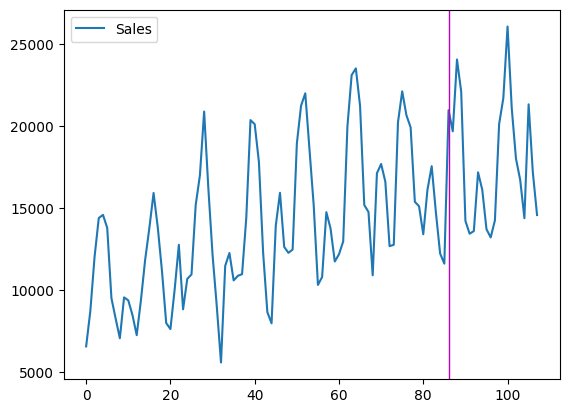

In [ ]:
df.plot()
plt.axvline(n_train, c='m', lw=1.0)
plt.show()

เส้นแนวดิ่งที่เห็น คือเส้นแบ่งข้อมูล Train(n_train), Test

## เตรียมข้อมูล

เนื่องจากข้อมูลยอดขายเป็นค่าตัวเลขสูงถึงสองหมื่น ให้ทำการ Normalize ปรับค่าให้อยู่ระหว่าง 0 ถึง 1

In [2]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()   # Scaler
data_sc = sc.fit_transform(df.values)   # Normalize (ใส่แค่ df เฉยๆก็ได้)
data_sc[:5]

array([[0.04783011],
       [0.15391359],
       [0.31454873],
       [0.42993522],
       [0.43928693]])

สร้างฟังก์ชันเพื่อเตรียมข้อมูลให้เป็นเมทริกซ์

In [6]:
def convertToMatrix(data, step=1):
  X, Y = [], []
  for i in range(len(data) - step):
    d = i + step
    X.append(data[i:d,])
    Y.append(data[d,])
  return np.array(X), np.array(Y)

นำข้อมูลที่ผ่านการ Normalize แล้ว ไปแบ่ง Train และ Test

In [8]:
train, test = data_sc[0:n_train], data_sc[n_train:]
train.shape, test.shape   # Train มี 86 Samples ส่วน Test มี 22 Samples

((86, 1), (22, 1))

กำหนดค่า Step ในที่นี้ ลองเลือก 1 Step จากนั้นทำการแบ่งข้อมูล x, y

In [9]:
step = 1    # ใช้ Step = 1
X_train, y_train = convertToMatrix(train, step)
X_test, y_test = convertToMatrix(test, step)

print('train test (after conversion):', X_train.shape, X_test.shape)

train test (after conversion): (85, 1, 1) (21, 1, 1)


In [10]:
y_train.shape, y_test.shape

((85, 1), (21, 1))

เมื่อผ่านการทำเมทริกซ์แล้ว กรณีกำหนด Step=1 จะทำให้ Train Test ถูกตัดไป 1 Sample จาก 86 Sample จะเหลือ 85 นอกจากนี้ฟังก์ชันทำการเปลี่ยนข้อมูลเป็นแบบ 3 มิติ คือ 85 Rows x 1 Column x 1 Feature (ลักษณะ Arrray 3 มิติ หรือ 3D Tensor)

## สร้าง Model

ทำการสร้าง Model กำหนดให้จำนวน Cell (units) มี 32 ส่วน Activation ใช้ ReLU และ มี Output 1 Node โดย input shape จะต้องกำหนดให้ตรงกับโครงสร้างข้อมูล Step ที่ได้ทำการเตรียมไว้ก่อนหน้านี้

In [11]:
model = Sequential()
model.add(LSTM(units=32, input_shape=(step, 1), activation="relu"))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4385 (17.13 KB)
Trainable params: 4385 (17.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


ทำการ Train พล็อตกราฟ Loss และประเมิน Score

In [12]:
history = model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=0)

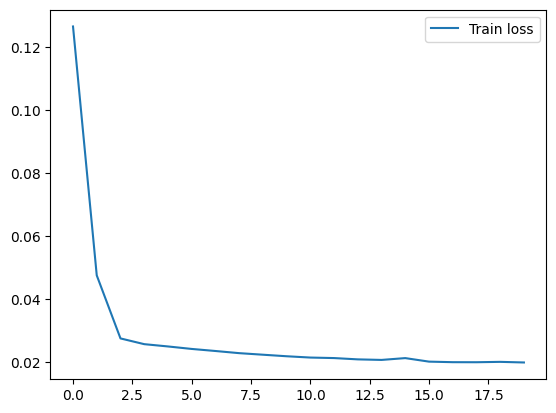

In [13]:
plt.plot(history.history['loss'], label='Train loss')
plt.legend()
plt.show()

ทำการประเมินทั้งส่วนของ Train Test และดูผล

In [14]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
trainPredict_inv = sc.inverse_transform(trainPredict)   # กลับสู่ค่าดั้งเดิมก่อน Normalize
testPredict_inv = sc.inverse_transform(testPredict)
y_train_inv = sc.inverse_transform(y_train)
y_test_inv = sc.inverse_transform(y_test)

r2_train = r2_score(y_train_inv, trainPredict_inv)
r2_test = r2_score(y_test_inv, testPredict_inv)

rmse_train = np.sqrt(mean_squared_error(y_train_inv, trainPredict_inv))
rmse_test = np.sqrt(mean_squared_error(y_test_inv, testPredict_inv))

print('R2 Train: {:.3f}'.format(r2_train))
print('R2 Test: {:.3f}'.format(r2_test))

print('RMSE Train: {:.3f}'.format(rmse_train))
print('RMSE Test: {:.3f}'.format(rmse_test))

1/1 [==============================] - 0s 20ms/step
R2 Train: 0.543
R2 Test: 0.162
RMSE Train: 2864.655
RMSE Test: 3467.996


พล็อตกราฟดูผลการ Predict เทียบกับ Dataset

In [15]:
prefix = np.empty(step).reshape(-1, 1)
prefix.fill(np.nan)

trainPredict_inv = np.concatenate((prefix, trainPredict_inv), axis=0)
testPredict_inv = np.concatenate((prefix, testPredict_inv), axis=0)

predict_inv = np.concatenate((trainPredict_inv, testPredict_inv),axis=0)

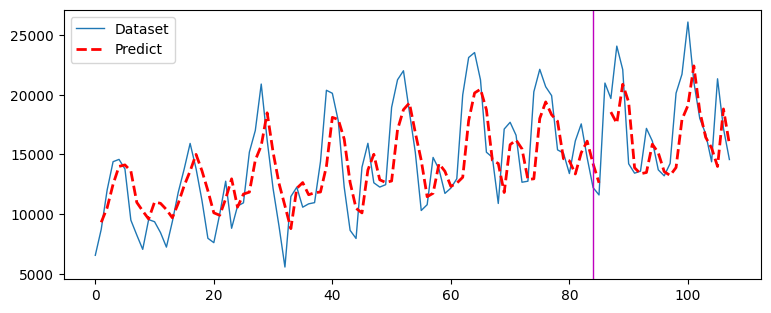

In [17]:
plt.figure(figsize=(9,3.5))
plt.plot(df.values, lw=1.0, label='Dataset')    # dataset
plt.plot(predict_inv, 'r--', lw=2.0, label='Predict')
plt.axvline(n_train-step-1, c='m', lw=1.0)
plt.legend()
plt.show()

ผลการ Predict เส้นบางคือข้อมูลจริง ส่วนเส้นหนาคือเส้นที่ LSTM ทำการ Predict จะเห็นว่ามีแตกต่างกันบ้าง แต่โดยรวมถือว่ามีเค้าโครงที่คล้ายกัน

## Predict

นำค่าส่วนท้ายมาเป็นอินพุตเพื่อ Predict ยอดขายเดือนถัดไป

In [19]:
X_input = X_train[-step:]

pred = model.predict(X_input)
pred_inv = sc.inverse_transform(pred)

print(pred_inv)
print('Prediction:', pred_inv[-1][-1])

1/1 [==============================] - 0s 96ms/step
[[12626.233]]
Prediction: 12626.233


ผลการ Predict จะได้เมทริกซ์ จากนั้นกำหนด index -1 เพื่อนำค่าสุดท้ายออกมาแสดงผล ซึ่งก็คือยอดขายรอบถัดไป นั้่นหมายถึง ค่าพยากรณ์ยอดขายเดือนถัดไป คือ 12626.233

ทำการคำนวณโดยใช้ค่าเฉลี่ยย้อนหลัง 6 เดือน

In [20]:
end = X_train.shape[0] + 1
n_back = 6    # ใช้ค่าย้อนหลัง 6 เดือน
avg_cal = df[end-n_back-1:end-1].sum() / df[end-n_back-1:end-1].count()
avg_cal = avg_cal.values[0]
print('Estimate the Average:', avg_cal.round(2))

Estimate the Average: 14859.33


ลองเทียบกับข้อมูลจริงๆ ของ Dataset (ยอดขายจริง)

In [21]:
y_true = y_train[-1].reshape(-1,1)
y_true = sc.inverse_transform(y_true)
y_true = np.squeeze(y_true)
print('Actural:', y_true)

Actural: 11608.0


จะเห็นว่าการ Predict ล่วงหน้าด้วย LSTM ได้ผลลัพธ์ที่ใกล้เคียงมากกว่าการใช้วิธีหาค่าเฉลี่ย

ทำการพล็อตกราฟดูจุดข้อมูลที่ Predict

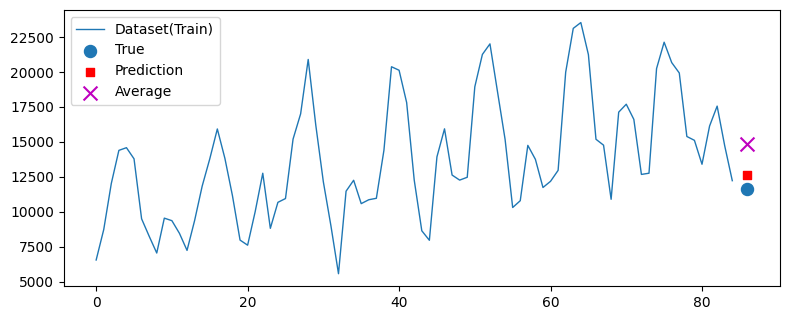

In [22]:
h_axis = X_train.shape[0] + 1

plt.figure(figsize=(8,3.3))
plt.plot(df[:n_train-step], lw=1.0, label='Dataset(Train)')    # dataset
plt.scatter(h_axis, y_true, s=75, label='True')
plt.scatter(h_axis, pred_inv[-1], s=40, c='r', marker='s', label='Prediction')
plt.scatter(h_axis, avg_cal, s=100, c='m', marker='x', label='Average')
plt.legend()
plt.tight_layout()
plt.show()

แสดงกราฟข้อมูลจริง และจุดอนาคตที่คาดการณ์ จะเห็นว่าการ Predict ล่วงหน้าด้วย LSTM ได้ผลลัพธ์ที่ใกล้เคียงมากกว่าการใช้ค่าเฉลี่ยย้อนหลัง


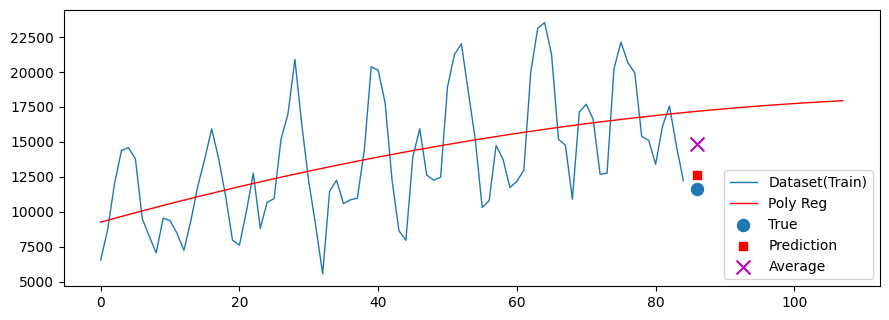

In [25]:
X = df.index.values.reshape(-1,1)
y = df.values

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
x_poly = poly_features.fit_transform(X)
model_poly = LinearRegression()
model_poly.fit(x_poly, y)

h_axis = X_train.shape[0] + 1
y_poly_pred = model_poly.predict(x_poly)

plt.figure(figsize=(9,3.3))
plt.plot(df[:n_train-step], lw=1.0, label='Dataset(Train)')
plt.plot(X, y_poly_pred, lw=1.0, color='r', label='Poly Reg')   # Prediction
plt.scatter(h_axis, y_true, s=75, label='True')
plt.scatter(h_axis, pred_inv[-1], s=40, c='r', marker='s', label='Prediction')
plt.scatter(h_axis, avg_cal, s=100, c='m', marker='x', label='Average')
plt.legend(loc=4)
plt.tight_layout()
plt.show()

จะเห็นว่าการ Predict ล่วงหน้าด้วย LSTM ได้ผลลัพธ์ที่ใกล้เคียงมากกว่าทั้งการใช้ค่าเฉลี่ยย้อนหลังและแบบ Polynomial Regression

ลองเปรียบเทียบค่าจริง และค่าที่ทำนายหรือคำนวณด้วยวิธีต่างๆที่กล่าวมา

In [27]:
x_input = [[109]]     # เดือนที่
y_poly_pred2 = model_poly.predict(poly_features.fit_transform(x_input))
y_poly_pred2 = np.squeeze(y_poly_pred2)
print('Prediction', y_poly_pred.round(3))

Prediction [[ 9258.466]
 [ 9395.313]
 [ 9531.109]
 [ 9665.855]
 [ 9799.552]
 [ 9932.198]
 [10063.795]
 [10194.342]
 [10323.839]
 [10452.286]
 [10579.683]
 [10706.03 ]
 [10831.328]
 [10955.575]
 [11078.773]
 [11200.921]
 [11322.019]
 [11442.067]
 [11561.065]
 [11679.013]
 [11795.911]
 [11911.76 ]
 [12026.559]
 [12140.307]
 [12253.006]
 [12364.655]
 [12475.254]
 [12584.804]
 [12693.303]
 [12800.752]
 [12907.152]
 [13012.502]
 [13116.802]
 [13220.052]
 [13322.252]
 [13423.402]
 [13523.502]
 [13622.553]
 [13720.553]
 [13817.504]
 [13913.405]
 [14008.256]
 [14102.057]
 [14194.808]
 [14286.509]
 [14377.161]
 [14466.762]
 [14555.314]
 [14642.815]
 [14729.267]
 [14814.669]
 [14899.022]
 [14982.324]
 [15064.576]
 [15145.779]
 [15225.931]
 [15305.034]
 [15383.087]
 [15460.09 ]
 [15536.043]
 [15610.946]
 [15684.8  ]
 [15757.603]
 [15829.357]
 [15900.06 ]
 [15969.714]
 [16038.318]
 [16105.872]
 [16172.376]
 [16237.831]
 [16302.235]
 [16365.59 ]
 [16427.894]
 [16489.149]
 [16549.354]
 [16608.509]
 

In [28]:
print('Actual Data:', y_true)
print('LSTM Prediction:', pred_inv[-1][-1].round(2))
print('Poly Prediction:', y_poly_pred2.round(2))
print('Average Prediction:', avg_cal.round(2))

Actual Data: 11608.0
LSTM Prediction: 12626.23
Poly Prediction: 17995.1
Average Prediction: 14859.33


จะเห็นว่าการ LSTM ได้ผลลัพธ์ที่ใกล้เคียงมากกว่าการใช้ค่าเฉลี่ยย้อนหลังและ Polynomial Regression


# (5.) LSTM หลายชั้น

LSTM คือ Neural Network สามารถกำหนดโครงสร้าง Model ให้มีหลายชั้นได้ (คล้ายกับการกำหนด Hidden Layer หลายชั้น) จะต้องกำหนดค่าดังนี้

- กำหนด return_sequences=TRUE เพื่อส่งค่า Sequence ให้กับ LSTM ในชั้นถัดไป
- LSTM ชั้นแรก กำหนด input_shape ตามโครงสร้างข้อมูลที่ Train ส่วนชั้นถัดๆไปไม่ต้องกำหนด เนื่องจากจะมีการส่งต่อกันเองอัตโนมัติ

ตัวอย่างต่อไปนี้แสดง LSTM จำนวน 3 ชั้น ต่อด้วย Output Layer (Dense) ขนาด 1 Node โดยไปก๊อปโค้ดจากข้อ 4

In [29]:
model = Sequential()
model.add(LSTM(units=32, input_shape=(step, 1), activation="relu",
               return_sequences=True))
model.add(LSTM(units=32, activation="relu", return_sequences=True))
model.add(LSTM(units=32, activation="relu"))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 1, 32)             4352      
                                                                 
 lstm_2 (LSTM)               (None, 1, 32)             8320      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21025 (82.13 KB)
Trainable params: 21025 (82.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


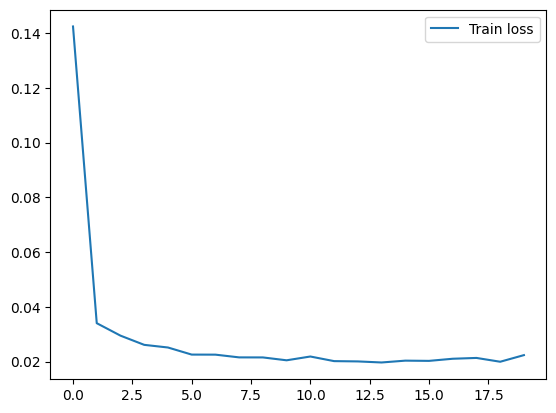

In [30]:
history = model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=0)

plt.plot(history.history['loss'], label='Train loss')
plt.legend()
plt.show()

In [31]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
trainPredict_inv = sc.inverse_transform(trainPredict)   # กลับสู่ค่าดั้งเดิมก่อน Normalize
testPredict_inv = sc.inverse_transform(testPredict)
y_train_inv = sc.inverse_transform(y_train)
y_test_inv = sc.inverse_transform(y_test)

r2_train = r2_score(y_train_inv, trainPredict_inv)
r2_test = r2_score(y_test_inv, testPredict_inv)

rmse_train = np.sqrt(mean_squared_error(y_train_inv, trainPredict_inv))
rmse_test = np.sqrt(mean_squared_error(y_test_inv, testPredict_inv))

print('R2 Train: {:.3f}'.format(r2_train))
print('R2 Test: {:.3f}'.format(r2_test))

print('RMSE Train: {:.3f}'.format(rmse_train))
print('RMSE Test: {:.3f}'.format(rmse_test))

1/1 [==============================] - 0s 106ms/step
R2 Train: 0.540
R2 Test: 0.078
RMSE Train: 2871.123
RMSE Test: 3637.549


In [32]:
prefix = np.empty(step).reshape(-1, 1)
prefix.fill(np.nan)

trainPredict_inv = np.concatenate((prefix, trainPredict_inv), axis=0)
testPredict_inv = np.concatenate((prefix, testPredict_inv), axis=0)

predict_inv = np.concatenate((trainPredict_inv, testPredict_inv),axis=0)

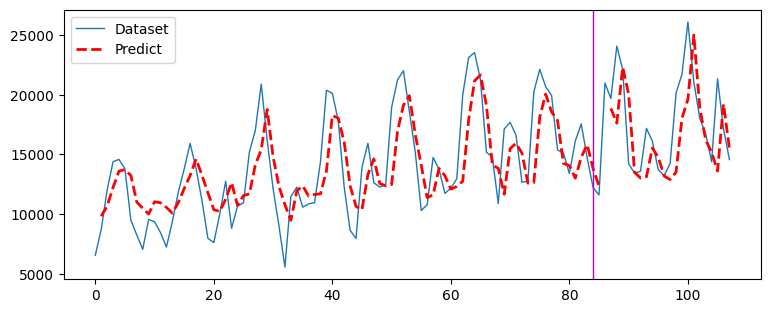

In [33]:
plt.figure(figsize=(9,3.5))
plt.plot(df.values, lw=1.0, label='Dataset')    # dataset
plt.plot(predict_inv, 'r--', lw=2.0, label='Predict')
plt.axvline(n_train-step-1, c='m', lw=1.0)
plt.legend()
plt.show()

ผลการ Predict และค่าต่างๆที่ประเมินได้ ของ LSTM หลายชั้น ค่อนข้างแย่กว่า LSTM 1 ชั้น

# (6.) GRU พยากรณ์หุ้น

## GRU คือหยัง?

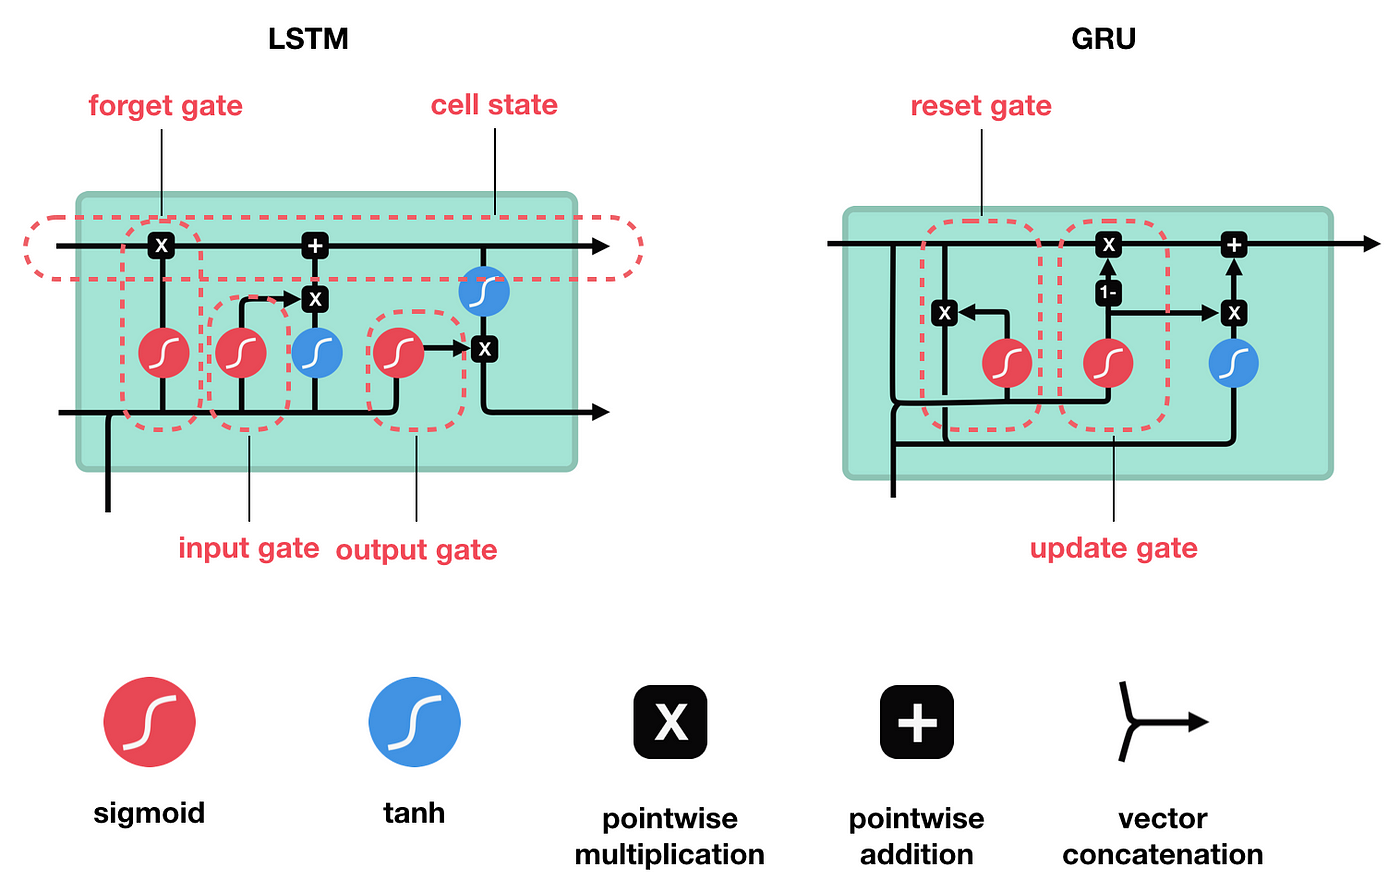

เอาเป็นว่า GRU คือ LSTM ที่ไม่มี Cell state (Ct) เหลือแค่ Hidden state (ht) และเหลือ Gate เพียง 2 ตัวคือ Reset gate และ Upgrade gate เท่านั้น

## Load data

ข้อนี้ใช้ GRU พยากรณ์ราคาหุ้นล่วงหน้า โดยข้อมูลที่ใช้เปิดคือราคาหุ้นของ IBM ที่บันทึกไว้ในช่วง Jan 2006 ถึง Jan 2018 ซึ่งบันทึกเป็นรายวัน ตามที่มีการเปิดตลาดซื้อขาย (ข้อมูลจาก kagle.com ให้ serach คำว่า "IBM_2006-01-01_to_2018-01-01.csv") เริ่ม import library จากนั้นอ่านข้อมูลแล้วตรวจดูข้อมูลเบื้องต้น

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout

df = pd.read_csv('/content/drive/MyDrive/deep_greenbook/datasets/IBM_2006-01-01_to_2018-01-01.csv')
df.index = pd.to_datetime(df.Date)   # เปลี่ยนข้อมูลให้เป็นชนิด Timestamp
df.head()

,Date,Open,High,Low,Close,Volume,Name
Date,,,,,,,
2006-01-03,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [80]:
df.tail()

,Date,Open,High,Low,Close,Volume,Name
Date,,,,,,,
2017-12-22,2017-12-22,151.82,153.00,151.50,152.50,2990583,IBM
2017-12-26,2017-12-26,152.51,153.86,152.50,152.83,2479017,IBM
2017-12-27,2017-12-27,152.95,153.18,152.61,153.13,2149257,IBM
2017-12-28,2017-12-28,153.20,154.12,153.20,154.04,2687624,IBM
2017-12-29,2017-12-29,154.17,154.72,153.42,153.42,3327087,IBM


- Open: ราคาหุ้น ณ เวลาเปิดทำการซื้อขาย (เวลาเปิดตลาด) เช่น 3/1/06 หุ้น IBM มีราคาเปิดอยู่ที่ 82.45/หุ้น
- High, Low: คือราคาหุ้น สูงสุด ต่ำสุด ที่ซื้อขายกันในวันนั้น
- Close: ราคาหุ้น ณ เวลาปิดทำการซื้อขาย (เวลาปิดตลาด)
- Volumne: ปริมาณหรือจำนวนหุ้นที่มีการซื้อขายในวันนั้น
- Name: ชื่อหุ้น (ในฐานข้อมูลรวมจะมีหุ้นจำนวนมาก แต่ในไฟล์นี้มีบันทุกไว้เฉพาะ IBM)

## เตรียมและตรวจดูข้อมูลเบื้องต้น

การทำนายราคาหุ้นล่วงหน้าในวันถัดไป ก็ขึ้นอยู่กับผู้วิเคราะห์ว่าจะใช้ราคาเปิดหรือปิด ส่วนใหญ่ใช้ราคาปิดตลาด

ตรวจสอบดูข้อมูลสูญหาย จะพบว่าคอลัมน์ Close ไม่มีข้อมูลสูญหาย ลองพล็อตดูข้อมูลด้วย

In [82]:
#df = df.Close   # ใช้คอลัมน์ราคาปิด รันบรรทัดนี้ได้แค่รอบเดียว
df

Date
2006-01-03     82.06
2006-01-04     81.95
2006-01-05     82.50
2006-01-06     84.95
2006-01-09     83.73
               ...  
2017-12-22    152.50
2017-12-26    152.83
2017-12-27    153.13
2017-12-28    154.04
2017-12-29    153.42
Name: Close, Length: 3020, dtype: float64

In [83]:
df.isnull().sum()     # close=0 ไม่มีข้อมูลสูญหาย

0

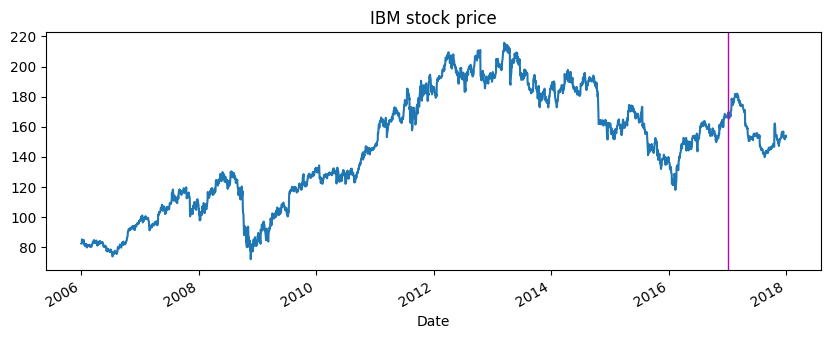

In [96]:
plt.figure(figsize=(10,3.5))
df.plot()
plt.axvline('2017', c='m', lw=1.0)
plt.title('IBM stock price')
plt.show()

ในที่นี้จะใช้ข้อมูลตังแต่เริ่มต้นช่วง 2006 จนถึงปลายปี 2016 เป็น Dataset สำหรับ Train ส่วนที่เหลือ (หลังส่วน Train) จะใช้เป็น Dataset สำหรับ Test

ตรวจสอบขนาดข้อมูลทั้งหมด และจำนวนข้อมูลที่ใช้ Train

In [98]:
print('Samples:', df.shape)
print('Train set:', df[:'2016'].shape)
print('Test set:', df['2017':].shape)

Samples: (3020,)
Train set: (2769,)
Test set: (251,)


ทำการ Normalize ปรับค่าให้อยู่ระหว่าง 0 ถึง 1

In [99]:
from sklearn.preprocessing import MinMaxScaler

data = df.values.reshape(-1,1)    # จัดข้อมูลให้อยู่ในรูปแบบเมทริกซ์ 1 คอลัมน์
sc = MinMaxScaler()
data_sc = sc.fit_transform(data)
data_sc[:5]

array([[0.07163682],
       [0.07087325],
       [0.0746911 ],
       [0.0916979 ],
       [0.08322921]])

สร้างฟังก์ชันเพื่อเตรียมข้อมูลเหมือน workshop ที่ผ่านมา

In [100]:
# ฟังก์ชันเปลี่ยนเป็นเมทริกซ์ข้อมูล X, y
def convertToMatrix(data, step=1):
  X, Y = [], []
  for i in range(len(data) - step):
    d = i + step
    X.append(data[i:d,])
    Y.append(data[d,])
  return np.array(X), np.array(Y)

n_train = 2769    # จำนวน Samples ที่จะนำไป Train (ตั้งแต่เริ่ม จนถึง Dec 2016)
train, test = data_sc[0:n_train], data_sc[n_train:]   # แบ่งเป็น Train, Test
train.shape, test.shape

((2769, 1), (251, 1))

กำหนดค่า Step ในที่นี้ใช้ข้อมูลย้อนหลัง 60 วัน จากนั้นทำการแบ่งเป็น x, y

In [103]:
step = 60

X_train, y_train = convertToMatrix(train, step)
X_test, y_test = convertToMatrix(test, step)

print('X train test (after conversion):', X_train.shape, X_test.shape)
print('y train test (after conversion):', y_train.shape, y_test.shape)

X train test (after conversion): (2709, 60, 1) (191, 60, 1)
y train test (after conversion): (2709, 1) (191, 1)


## สร้าง Model

ทำการสร้าง Model กำหนดให้มี GRU 2 ชั้น และมี Dropout 20% (สุ่มปิดการการทำงาน Neuron 20%) Activation ใช้ ReLU และมี Output 1 Node ซึ่ง input shape จะต้องกำหนดโดยตรงกับโครงสร้างข้อมูล step ที่ได้จากการเตรียมข้อมูลไว้ก่อนหน้านี้ (ค่า step = 60)

In [104]:
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(step, 1), activation="relu"))
model.add(Dropout(0.2))
model.add(GRU(units=40, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 50)            7950      
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 40)                11040     
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 19031 (74.34 KB)
Trainable params: 19031 (74.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


ทำการ Train(ใช้เวลาเยอะอยู่) พล็อตกราฟ Loss

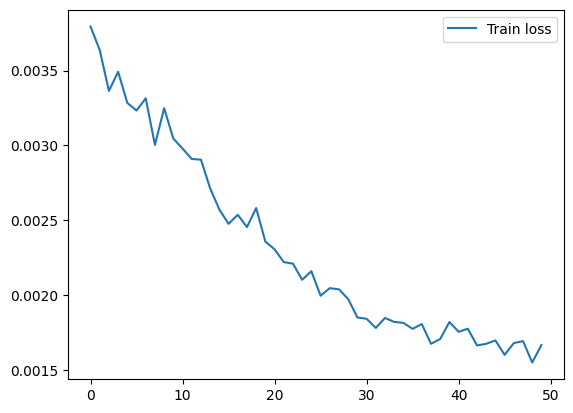

In [108]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

plt.plot(history.history['loss'], label='Train loss')
plt.legend()
plt.show()

ดูผลประเมิน

In [109]:
testPredict = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
testPredict_inv = sc.inverse_transform(testPredict)   # กลับสู่ค่าดั้งเดิมก่อน Normalize
y_test_inv = sc.inverse_transform(y_test)

r2_test = r2_score(y_test_inv, testPredict_inv)
rmse_test = np.sqrt(mean_squared_error(y_test_inv, testPredict_inv))

print('R2 Test: {:.3f}'.format(r2_test))
print('RMSE Test: {:.3f}'.format(rmse_test))

6/6 [==============================] - 0s 14ms/step
R2 Test: 0.920
RMSE Test: 2.100


พล็อตกราฟดูผลการ Predict เทียบกับตัว Test ของ Dataset(ค่าตัวเลขการปิดตลาดจริง)

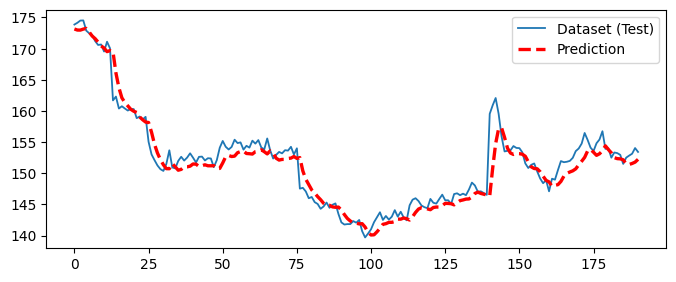

In [110]:
plt.figure(figsize=(12-4,3.1))
plt.plot(y_test_inv, lw=1.3, label='Dataset (Test)')
plt.plot(testPredict_inv, 'r--', lw=2.4, label='Prediction')
plt.legend()
plt.show()

จะเห็นว่าเส้นที่ได้จากการ Predict ใกล้เคียงกับเส้นข้อมูลจริง

## ลองใช้ LSTM

In [111]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(step, 1), activation="relu"))
model.add(Dropout(0.2))
model.add(LSTM(units=40, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 40)                14560     
                                                                 
 dropout_3 (Dropout)         (None, 40)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 25001 (97.66 KB)
Trainable params: 25001 (97.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


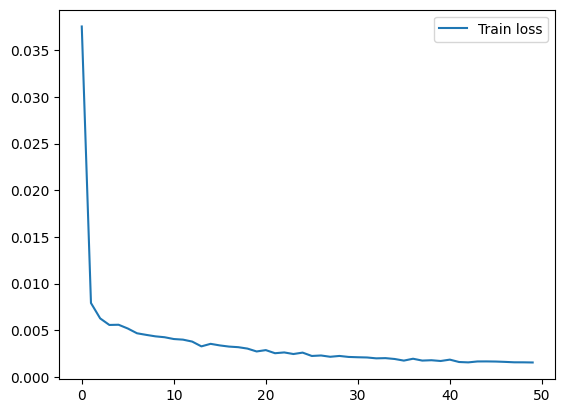

In [112]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

plt.plot(history.history['loss'], label='Train loss')
plt.legend()
plt.show()

In [113]:
testPredict = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
testPredict_inv = sc.inverse_transform(testPredict)   # กลับสู่ค่าดั้งเดิมก่อน Normalize
y_test_inv = sc.inverse_transform(y_test)

r2_test = r2_score(y_test_inv, testPredict_inv)
rmse_test = np.sqrt(mean_squared_error(y_test_inv, testPredict_inv))

print('R2 Test: {:.3f}'.format(r2_test))
print('RMSE Test: {:.3f}'.format(rmse_test))

6/6 [==============================] - 0s 14ms/step
R2 Test: 0.893
RMSE Test: 2.433


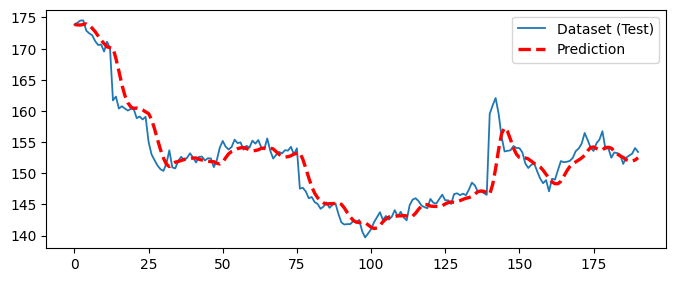

In [114]:
plt.figure(figsize=(12-4,3.1))
plt.plot(y_test_inv, lw=1.3, label='Dataset (Test)')
plt.plot(testPredict_inv, 'r--', lw=2.4, label='Prediction')
plt.legend()
plt.show()